<a href="https://colab.research.google.com/github/roberthsu2003/machine_learning/blob/main/%E6%A0%B8%E5%8C%96%E6%94%AF%E6%8F%B4%E5%90%91%E9%87%8F%E6%A9%9F/svm_1%E7%84%A1%E6%B3%95%E4%BD%BF%E7%94%A8%E7%B7%9A%E6%80%A7%E5%88%86%E5%89%B2%E7%9A%84%E7%AF%84%E4%BE%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2個類別的分類
### 線性可分的定義：
- 如果資料可以用一條直線（在2D空間）或一個超平面（在高維空間）完全分開，那麼這些資料就是線性可分的。
- 在這種情況下，使用線性模型（如線性SVM）是合適的。

### 如何判斷是否線性可分：
- 在2D空間中，我們可以通過視覺化來判斷
- 如果不同類別的點可以用一條直線分開，就是線性可分
- 如果不同類別的點交錯在一起，無法用直線分開，就是非線性可分

### 為什麼要使用線性模型：
- 為什麼要使用線性模型：
- 線性模型計算效率高
- 解釋性好
- 不容易過擬合
- 如果資料確實是線性可分的，線性模型就能得到很好的結果

### 如果資料不是線性可分的：
- 我們可以使用核化技巧（Kernel Trick）
- 將資料映射到更高維的空間，使其變得線性可分
- 常用的核函數包括：RBF核、多項式核等

In [10]:
%%capture
%pip install wget mglearn

In [11]:
#下載中文字型
import wget
wget.download("https://github.com/roberthsu2003/machine_learning/raw/refs/heads/main/source_data/ChineseFont.ttf")

'ChineseFont.ttf'

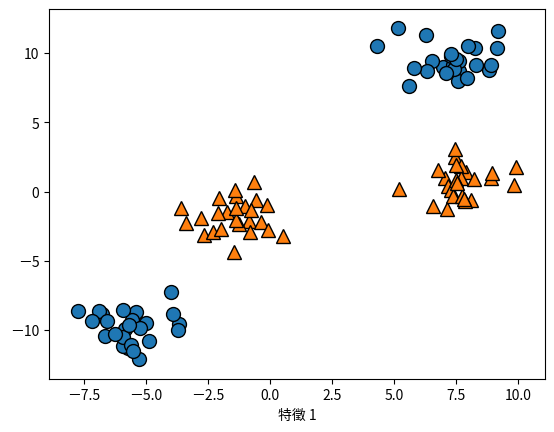

In [12]:
from sklearn.datasets import make_blobs
import mglearn
import matplotlib as mlp
from matplotlib.font_manager import fontManager
import matplotlib.pyplot as plt

fontManager.addfont('ChineseFont.ttf')
mlp.rc('font', family='ChineseFont')

X, y= make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0],X[:, 1], y)

plt.xlabel("特徵 0")
plt.xlabel("特徵 1")
plt.show()

⬆︎2個類別無法使用1條線來線性分類

### 說明1
`make_blobs` 函數返回的 `X` 和 `y` 的資料類型：

1. **X 的資料類型**：
   - `X` 是一個 NumPy 陣列（numpy.ndarray）
   - 形狀為 (n_samples, n_features)
   - 預設情況下：
     - n_samples = 100（樣本數）
     - n_features = 2（特徵數）
   - 資料類型為 float64
   - 每個樣本包含兩個特徵值，代表二維空間中的座標

2. **y 的資料類型**：
   - `y` 也是一個 NumPy 陣列（numpy.ndarray）
   - 形狀為 (n_samples,)
   - 資料類型為 int64
   - 包含每個樣本對應的類別標籤
   - 在這個例子中，由於 `centers=4`，所以 y 的值範圍是 0 到 3

我們可以通過以下方式驗證：

```python
print("X的類型:", type(X))
print("X的形狀:", X.shape)
print("X的資料類型:", X.dtype)
print("\ny的類型:", type(y))
print("y的形狀:", y.shape)
print("y的資料類型:", y.dtype)
print("y的唯一值:", np.unique(y))
```

這些資料的結構對於後續的機器學習模型非常重要：
- `X` 的形狀決定了我們可以使用的特徵數量
- `y` 的形狀確保了每個樣本都有對應的標籤
- 資料類型確保了計算的準確性和效率

由於使用了 `centers=4`，所以 `y` 中的標籤會是 0、1、2、3 這四個值，代表四個不同的類別。當您執行 `y = y % 2` 後，這些標籤會被轉換為 0 和 1，將四個類別合併為兩個類別。


⬇︎2個類別無法使用1條線來線性分類
- 使用LinearSVC模型建立決策邊界

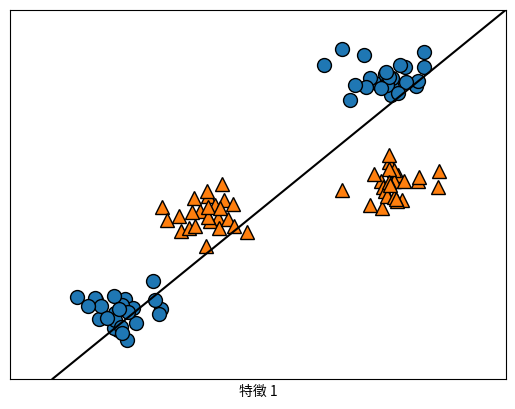

In [13]:
from sklearn.datasets import make_blobs
import mglearn
import matplotlib as mlp
from matplotlib.font_manager import fontManager
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC

fontManager.addfont('ChineseFont.ttf')
mlp.rc('font', family='ChineseFont')

X, y= make_blobs(centers=4, random_state=8)
y = y % 2

linear_svm = LinearSVC().fit(X, y)
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

plt.xlabel("特徵 0")
plt.xlabel("特徵 1")
plt.show()